C'est ici que toute la documentation du pipeline, les résultats et les analyses visuelles sont intégrés.

Ce notebook contient les explications et appelle les scripts du dossier src/ pour exécuter chaque étape du pipeline.

On l'utilise pour charger et exécuter le pipeline étape par étape. 

Par exemple, pour exécuter la partie nettoyage, importer et exécuter data_preprocessing.py depuis src/.

À chaque étape (nettoyage, analyse des données, visualisations), ajouter des cellules Markdown dans le notebook pour expliquer ce que fait chaque étape, pourquoi elle est nécessaire, et les observations tirées des résultats.

C’est également ici que nous ajouterons les graphiques et analyses visuelles pour expliquer nos résultats intermédiaires.

Expliquer ce que l'on fait dans notre projet et que pour ce faire nous utiliserons une version clean de movie_metadata.
On affiche à partir de quelle année notre base de données de films commence pour exclure les évènements historiques trop lointains dans notre dataset additionnel.
On veut garder la première colonne pour relier le film à son résumé mais aussi la plupart des autres.
On veut transformer les formats de dates pour l’analyse temporelle.

In [63]:
from src.data_preprocessing import *
from tests.test_data_preprocessing import test_cleaned_movie_data
import matplotlib.pyplot as plt 
import pandas as pd
import ast
import numpy as np

In [64]:
movies_data = pd.read_csv("data/MovieSummaries/movie.metadata.tsv", header= None, delimiter='\t') # Columns are separated by tabs rather than commas

Open the preprocessed dataset, ready for analysis

In [65]:
preprocessed_movies = pd.read_csv("data\Preprocessed_data\preprocessed_movie_metadata.csv")

#### Number of film of year

It is important to note for our future analysis that the number of films produced each year is not uniform. This variability should be considered when comparing film counts over time. In some cases, working with proportions rather than absolute numbers may provide us more interesting insights.


Text(0.5, 1.0, 'Number of movies per year')

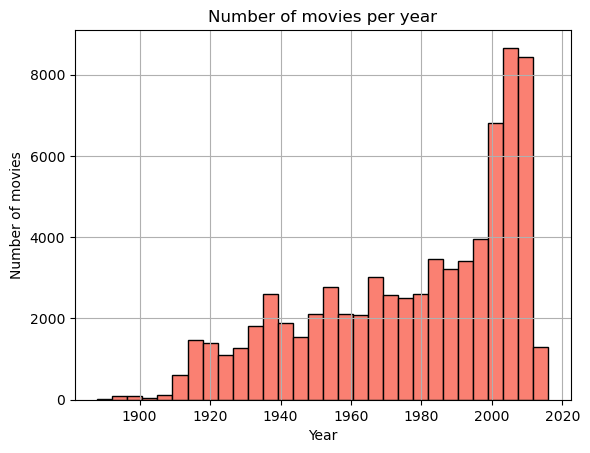

In [66]:
preprocessed_movies["Year"].hist(bins=30, range=(preprocessed_movies["Year"].min(), preprocessed_movies["Year"].max()), color = 'salmon', edgecolor = 'black')
plt.xlabel("Year")
plt.ylabel("Number of movies")
plt.title("Number of movies per year")

# Genre Movie exploring

In [67]:
#Number of genres in the dataset but we can see that there are a lot of categories that could be combined
genres = preprocessed_movies['Movie genres'].str.split(', ').explode().unique()
print(len(genres),genres)

363 ['Thriller' 'Science Fiction' 'Horror' 'Adventure' 'Supernatural' 'Action'
 'Space western' 'Mystery' 'Biographical film' 'Drama' 'Crime Drama'
 'Crime Fiction' 'Erotic thriller' 'Psychological thriller' 'Short Film'
 'Silent film' 'Indie' 'Black-and-white' 'Comedy' 'Family Film' 'Fantasy'
 'World cinema' 'Musical' 'Japanese Movies' 'Action/Adventure'
 'Romantic comedy' 'Ensemble Film' 'Comedy-drama' 'Romantic drama'
 'Romance Film' 'Costume drama' 'War film' 'Epic' 'Period piece'
 'Film adaptation' "Children's/Family" "Children's Fantasy" 'Future noir'
 'Comedy film' 'Coming of age' 'Suspense' 'Crime Thriller' 'Black comedy'
 'Bollywood' 'Marriage Drama' 'Wuxia' 'Martial Arts Film' 'Chinese Movies'
 'Western' 'Parody' 'Mockumentary' 'Fan film' 'Cult' 'Adventure Comedy'
 'Slapstick' 'Biopic [feature]' 'Historical Epic' 'Sports' 'Family Drama'
 'Political drama' 'Historical fiction' 'Courtroom Drama'
 'Culture & Society' 'Biography' 'Documentary' 'Christmas movie'
 'Television movie

There are 363 different genres, many genres are used to described the film. Here a genre regroup a lot of information: the thematic, the technical characteristics, ... 
Clearly, not all of these information are useful for our analysis. We need to select to best to regroup the film in a meaningful way.

## Petite tentative pour observer les war movies

In [68]:
War_movies = preprocessed_movies[preprocessed_movies['Movie genres'].str.contains(r'war', case=False, na=False)]
War_movies_comedy = War_movies[War_movies['Movie genres'].str.contains(r'comedy', case=False, na=False)]
War_movies_drama = War_movies[War_movies['Movie genres'].str.contains(r'drama', case=False, na=False)]
print(len(War_movies), len(War_movies_comedy), len(War_movies_drama))

2550 228 1697


Text(0.5, 1.0, 'Number of movies per year')

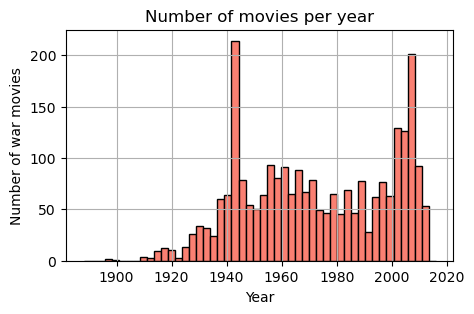

In [69]:
plt.figure(figsize=(5,3))
War_movies["Year"].hist(bins=50, range=(preprocessed_movies["Year"].min(), preprocessed_movies["Year"].max()), color = 'salmon', edgecolor = 'black')

plt.xlabel("Year")
plt.ylabel("Number of war movies")
plt.title("Number of movies per year")

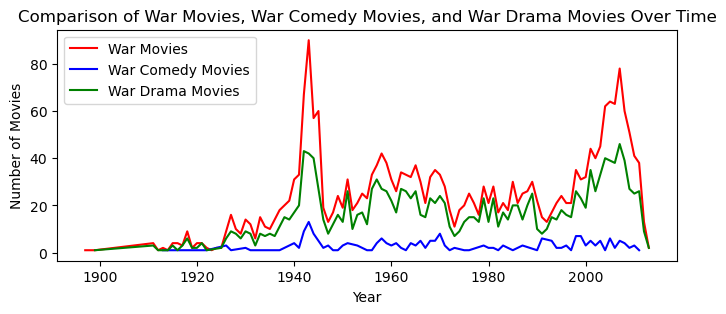

In [70]:
plt.figure(figsize=(8, 3))

# Count the number of movies in each category per year
war_movies_per_year = War_movies.groupby('Year').size()
war_comedy_movies_per_year = War_movies_comedy.groupby('Year').size()
war_drama_movies_per_year = War_movies_drama.groupby('Year').size()

# Plot the data
plt.plot(war_movies_per_year.index, war_movies_per_year.values, label='War Movies', color='red')
plt.plot(war_comedy_movies_per_year.index, war_comedy_movies_per_year.values, label='War Comedy Movies', color='blue')
plt.plot(war_drama_movies_per_year.index, war_drama_movies_per_year.values, label='War Drama Movies', color='green')

plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Comparison of War Movies, War Comedy Movies, and War Drama Movies Over Time')
plt.legend()
plt.show()



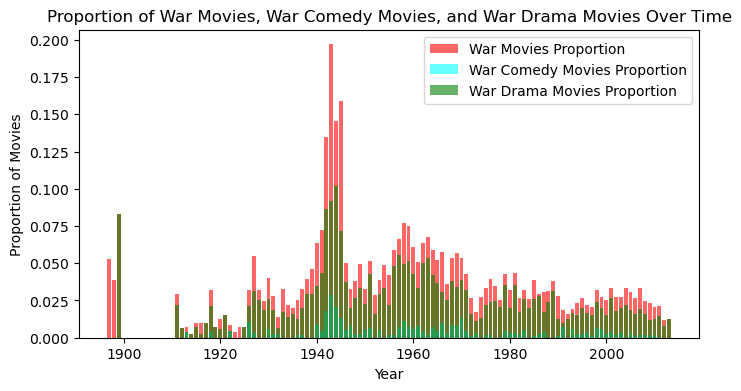

In [71]:
total_movies_per_year = preprocessed_movies.groupby('Year').size()

# Calculate the proportion of each category of movie per year
war_movies_proportion = war_movies_per_year / total_movies_per_year
war_comedy_movies_proportion = war_comedy_movies_per_year / total_movies_per_year
war_drama_movies_proportion = war_drama_movies_per_year / total_movies_per_year

plt.figure(figsize=(8, 4))
plt.bar(war_movies_proportion.index, war_movies_proportion.values, label='War Movies Proportion', color='red', alpha=0.6)
plt.bar(war_comedy_movies_proportion.index, war_comedy_movies_proportion.values, label='War Comedy Movies Proportion', color='cyan', alpha=0.6)
plt.bar(war_drama_movies_proportion.index, war_drama_movies_proportion.values, label='War Drama Movies Proportion', color='green', alpha=0.6)

plt.xlabel('Year')
plt.ylabel('Proportion of Movies')
plt.title('Proportion of War Movies, War Comedy Movies, and War Drama Movies Over Time')
plt.legend(loc='upper right')
plt.show()

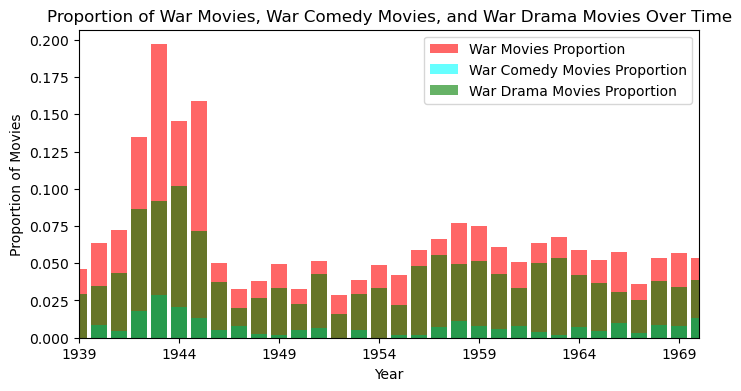

In [72]:
plt.figure(figsize=(8, 4))
plt.bar(war_movies_proportion.index, war_movies_proportion.values, label='War Movies Proportion', color='red', alpha=0.6)
plt.bar(war_comedy_movies_proportion.index, war_comedy_movies_proportion.values, label='War Comedy Movies Proportion', color='cyan', alpha=0.6)
plt.bar(war_drama_movies_proportion.index, war_drama_movies_proportion.values, label='War Drama Movies Proportion', color='green', alpha=0.6)

plt.xlabel('Year')
plt.xlim(1939, 1970)
plt.xticks(np.arange(1939, 1971, 5))
plt.ylabel('Proportion of Movies')
plt.title('Proportion of War Movies, War Comedy Movies, and War Drama Movies Over Time')
plt.legend(loc='upper right')
plt.show()

## fin mini war movie analysis youhouu


In [73]:
cleaned_movies_data = clean_movie_data(movies_data)

len(cleaned_movies_data)


8243

In [74]:
#Checking if the cleaning worked 
test_cleaned_movie_data(cleaned_movies_data)

# Print the cleaned data results
print(cleaned_movies_data.head())


à compléter
           0           1                         2           3            4  \
0     975900   /m/03vyhn            Ghosts of Mars  2001-08-24   14010832.0   
7   10408933  /m/02qc0j7  Alexander's Ragtime Band  1938-08-16    3600000.0   
13    171005   /m/016ywb                   Henry V  1989-11-08   10161099.0   
17     77856    /m/0kcn7              Mary Poppins  1964-08-27  102272727.0   
21    612710   /m/02wjqm            New Rose Hotel  1999-10-01      21521.0   

        5                                   6  \
0    98.0  {"/m/02h40lc": "English Language"}   
7   106.0  {"/m/02h40lc": "English Language"}   
13  137.0  {"/m/02h40lc": "English Language"}   
17  139.0  {"/m/02h40lc": "English Language"}   
21   92.0  {"/m/02h40lc": "English Language"}   

                                            7  \
0   {"/m/09c7w0": "United States of America"}   
7   {"/m/09c7w0": "United States of America"}   
13             {"/m/07ssc": "United Kingdom"}   
17  {"/m/09c7w0": "Uni

On veut aussi clean et tokeniser les résumés de films pour en trouver plus facilement le thème (lien historique ou non) et se débarasser des valeurs manquantes.

In [75]:
from src.data_preprocessing import vectorize_plot_data, clean_plot_data
from tests.test_data_preprocessing import test_cleaned_plot_data, test_vectorized_plot_data
import pandas as pd

plot_data = pd.read_csv("data/MovieSummaries/plot_summaries.txt", delimiter='\t', header=None, names=['id', 'plot']) #document texte

# Cleaning the raw data and checking if it worked
cleaned_plot_data= clean_plot_data(plot_data)
test_cleaned_plot_data(cleaned_plot_data)

#Vectorizing/Tokenizing the cleaned data and checking if it worked
vectorized_plot_data = vectorize_plot_data(cleaned_plot_data)
test_vectorized_plot_data(vectorize_plot_data)

# Print the cleaned and vectorized/tokenized data results
print(vectorized_plot_data.head())

à compléter
à compléter
         id                                               plot
0  23890098  Shlykov, a hard-working taxi driver and Lyosha...
1  31186339  The nation of Panem consists of a wealthy Capi...
2  20663735  Poovalli Induchoodan  is sentenced for six yea...
3   2231378  The Lemon Drop Kid , a New York City swindler,...
4    595909  Seventh-day Adventist Church pastor Michael Ch...


Enfin, on veut clean notre dataset additionnel, création de catégories utiles pour l’analyse, comme « guerre », « crise économique », « période de stabilité ». On cherche encore ici à vectoriser et mettre sous forme de token certains types de mots en identifiant les catégories qui nous intéressent.
On veut éliminer les valeurs manquantes ainsi que les événements historiques beaucoup trop vieux pour notre analyse.
Peu importe la méthode utilisée pour tokeniser/vectroriser, expliquer ici pourquoi c'est approprié pour nos objectif et donner une  brève explication mathématique si possible.
On veut aussi transformer les formats de dates pour l’analyse temporelle à l'image de notre movie dataset.

In [76]:
from src.data_preprocessing import vectorize_historical_data, clean_historical_data
from tests.test_data_preprocessing import test_cleaned_historical_data, test_vectorized_historical_data
import pandas as pd

history_data = pd.read_csv("data/HistoricalDataset/historical.dataset.csv")

# Cleaning the raw data of the history dataset
print('\n The size of the original historical dataset is', history_data.shape)
cleaned_history = clean_historical_data(movies_data, history_data)
print('\n', cleaned_history.head())
print('\n The size of the cleaned historical dataset is now', cleaned_history.shape) 



test_cleaned_historical_data(cleaned_history)

# save the cleaned data to a csv file
processed_data_path = 'data/Preprocessed_data/preprocessed_history.csv'
cleaned_history.to_csv(processed_data_path, encoding='utf-8', errors='ignore', index=False)


#Vectorizing/Tokenizing the cleaned data and checking if it worked
vectorized_historical_data = vectorize_historical_data(cleaned_history)
test_vectorized_historical_data(vectorize_historical_data)

# Print the cleaned and vectorized/tokenized data results
print(vectorized_historical_data.head())


 The size of the original historical dataset is (1096, 12)

 In our dataset, the first movie that was released was in 1892

     Sl. No                  Name of Incident  Year Country      Type of Event  \
5        9                Partition of India  1947   India          Partition   
6       10  IndoUnknownPakistani War of 1971  1971   India                War   
7       11    PokhranUnknownII Nuclear Tests  1998   India       Nuclear Test   
8       12             Mumbai Terror Attacks  2008   India          Terrorism   
12      16                 Swadeshi Movement  1905   India  National Movement   

                                               Impact  \
5   Creation of India and Pakistan; massive popula...   
6               Led to the independence of Bangladesh   
7               India declared itself a nuclear state   
8   Highlighted the threat of international terrorism   
12  Promoted Indian goods; protest against British...   

          Affected Population        Importa

c:\Users\lauri\Documents\GitHub\ada-2024-project-nostringsadached\src\data_preprocessing.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data_history['Year'] = cleaned_data_history['Year'].astype(int) # converts the column ['Year'] from str to int


La prochaine étape est de faire des plots, voici mes idées mais rajoutez en à votre guise!! 

- Proportion de chaque genre dans les films sortis chaque année. (lineplot?)
- Heatmap temporelle avec les années et les genres pourrait aussi aider à voir les pics et baisses de popularité des genres.
- Comparer les genres populaires à des périodes historiques précises (avant, pendant, après).
- Ligne temporelle des revenus du box office pour des genres particuliers, avec des annotations pour les films les plus réussis. Les pics ou succès importants peuvent être marqués pour voir si d'autres films de genre similaire ont suivi. (matplotib.pyplot)
- Montrez la durée pendant laquelle un genre reste populaire après le succès d’un film spécifique. Chaque barre représente un genre et montre la période pendant laquelle il est resté en tendance. (barplot?)
- Carte géographique et graphique pour montrer l’origine des films (par pays) et un graphique en barres empilées pour voir comment les genres évoluent dans les différentes régions, en mettant en avant la diffusion de genres américains. (plotly.express.choropleth et seaborn)


In [77]:
# Appels au méthodes de plot dans analysis dans src apres nettoyage.